## 1.0 Sectoral Emissions and Climate Impact Model

In [41]:
# Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os

In [20]:
# Load datasets
co2_sector = pd.read_csv("../Data/Climate Change - datasets/co2-emissions-by-sector.csv")
ghg_sector = pd.read_csv("../Data/Climate Change - datasets/green house gas-emissions-by-sector.csv")

# Display first few rows of each dataset to understand structure
co2_sector.head(), ghg_sector.head()


(        Entity Code  Year  Carbon dioxide emissions from buildings  \
 0  Afghanistan  AFG  1990                                129999.99   
 1  Afghanistan  AFG  1991                                140000.00   
 2  Afghanistan  AFG  1992                                150000.00   
 3  Afghanistan  AFG  1993                                160000.00   
 4  Afghanistan  AFG  1994                                160000.00   
 
    Carbon dioxide emissions from industry  \
 0                                 50000.0   
 1                                 50000.0   
 2                                 50000.0   
 3                                 50000.0   
 4                                 50000.0   
 
    Carbon dioxide emissions from land use change and forestry  \
 0                                         -2390000.0            
 1                                         -2390000.0            
 2                                         -2390000.0            
 3                            

In [31]:
co2_sector.info(), ghg_sector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6560 entries, 0 to 6559
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Entity                                                        6560 non-null   object 
 1   Code                                                          6208 non-null   object 
 2   Year                                                          6560 non-null   int64  
 3   Carbon dioxide emissions from buildings                       6421 non-null   float64
 4   Carbon dioxide emissions from industry                        6305 non-null   float64
 5   Carbon dioxide emissions from land use change and forestry    6557 non-null   float64
 6   Carbon dioxide emissions from other fuel combustion           6421 non-null   float64
 7   Carbon dioxide emissions from transport                       6421 no

(None, None)

In [21]:
# Merge CO2 and GHG emissions datasets on Entity, Code, and Year
merged_sector_emissions = pd.merge(co2_sector, ghg_sector, on=["Entity", "Code", "Year"], suffixes=("_CO2", "_GHG"))

# Display merged dataset structure
merged_sector_emissions.head()


,Entity,Code,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,...,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels
0,Afghanistan,AFG,1990,129999.99,50000.0,-2390000.0,0.0,970000.0,570000.0,NaN,...,-2390000.0,1230000.0,129999.99,50000.0,570000.0,970000.0,320000.0,280000.0,0.0,20000.0
1,Afghanistan,AFG,1991,140000.00,50000.0,-2390000.0,0.0,930000.0,530000.0,NaN,...,-2390000.0,1320000.0,140000.00,60000.0,530000.0,930000.0,300000.0,240000.0,0.0,20000.0
2,Afghanistan,AFG,1992,150000.00,50000.0,-2390000.0,0.0,740000.0,390000.0,NaN,...,-2390000.0,1400000.0,150000.00,60000.0,390000.0,740000.0,200000.0,200000.0,0.0,20000.0
3,Afghanistan,AFG,1993,160000.00,50000.0,-2390000.0,0.0,740000.0,380000.0,NaN,...,-2390000.0,1490000.0,160000.00,60000.0,380000.0,740000.0,200000.0,160000.0,0.0,20000.0
4,Afghanistan,AFG,1994,160000.00,50000.0,-2390000.0,0.0,730000.0,360000.0,NaN,...,-2390000.0,1580000.0,160000.00,60000.0,360000.0,730000.0,190000.0,120000.0,0.0,20000.0


In [24]:
# Fill missing values with 0 (assuming missing means no reported emissions)
merged_sector_emissions.fillna(0, inplace=True)

# Verify if missing values are handled
merged_sector_emissions.isna().sum()

Entity                                                           0
Code                                                             0
Year                                                             0
Carbon dioxide emissions from buildings                          0
Carbon dioxide emissions from industry                           0
Carbon dioxide emissions from land use change and forestry       0
Carbon dioxide emissions from other fuel combustion              0
Carbon dioxide emissions from transport                          0
Carbon dioxide emissions from manufacturing and construction     0
Fugitive emissions of carbon dioxide from energy production      0
Carbon dioxide emissions from electricity and heat               0
Carbon dioxide emissions from bunker fuels                       0
Greenhouse gas emissions from agriculture                        0
Greenhouse gas emissions from land use change and forestry       0
Greenhouse gas emissions from waste                           

In [30]:
merged_sector_emissions.duplicated().sum()

0

In [26]:
merged_sector_emissions.describe()

,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels,...,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels
count,6560.000000,6.560000e+03,6.560000e+03,6.560000e+03,6.560000e+03,6.560000e+03,6.560000e+03,6.560000e+03,6.560000e+03,6.560000e+03,...,6.560000e+03,6.560000e+03,6.560000e+03,6.560000e+03,6.560000e+03,6.560000e+03,6.560000e+03,6.560000e+03,6.560000e+03,6.560000e+03
mean,2005.500000,5.392950e+07,2.058766e+07,2.575887e+07,1.220180e+07,1.139997e+08,9.923400e+07,5.495779e+06,2.462702e+08,1.890394e+07,...,3.094321e+07,2.968325e+07,5.937756e+07,3.869813e+07,9.992608e+07,1.170832e+08,2.473395e+08,5.347700e+07,1.244732e+07,1.908074e+07
std,9.233796,2.500115e+08,1.164643e+08,2.464355e+08,5.704109e+07,5.727367e+08,5.100586e+08,2.543849e+07,1.204424e+09,9.392809e+07,...,2.632326e+08,1.320236e+08,2.712886e+08,2.014247e+08,5.134117e+08,5.878749e+08,1.209695e+09,2.499946e+08,5.823173e+07,9.481020e+07
min,1990.000000,0.000000e+00,0.000000e+00,-1.637860e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.628370e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1997.750000,6.000000e+04,0.000000e+00,-6.700000e+05,0.000000e+00,5.075000e+05,1.300000e+05,0.000000e+00,1.700000e+05,6.000000e+04,...,-6.700000e+05,3.675000e+05,1.100000e+05,1.100000e+05,1.400000e+05,5.100000e+05,1.700000e+05,0.000000e+00,0.000000e+00,6.000000e+04
50%,2005.500000,5.900000e+05,4.350000e+05,3.000000e+04,2.100000e+05,3.020000e+06,1.400000e+06,0.000000e+00,3.610000e+06,5.000000e+05,...,6.000000e+04,1.830000e+06,1.350000e+06,9.300000e+05,1.420000e+06,3.095000e+06,3.645000e+06,2.950000e+05,2.300000e+05,5.100000e+05
75%,2013.250000,6.765000e+06,2.730000e+06,9.880000e+06,1.982500e+06,1.759000e+07,1.266000e+07,6.325000e+05,3.257750e+07,3.000000e+06,...,1.061750e+07,7.182500e+06,8.502500e+06,5.550000e+06,1.280500e+07,1.804250e+07,3.277000e+07,8.282500e+06,2.020000e+06,3.022500e+06
max,2021.000000,2.822010e+09,1.696360e+09,2.405250e+09,7.519400e+08,8.279320e+09,6.427310e+09,3.227600e+08,1.622524e+10,1.325790e+09,...,2.796530e+09,1.677360e+09,3.091260e+09,3.260350e+09,6.472360e+09,8.493200e+09,1.630219e+10,3.336260e+09,7.686300e+08,1.338160e+09


In [28]:
merged_sector_emissions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6560 entries, 0 to 6559
Data columns (total 23 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Entity                                                         6560 non-null   object 
 1   Code                                                           6560 non-null   object 
 2   Year                                                           6560 non-null   int64  
 3   Carbon dioxide emissions from buildings                        6560 non-null   float64
 4   Carbon dioxide emissions from industry                         6560 non-null   float64
 5   Carbon dioxide emissions from land use change and forestry     6560 non-null   float64
 6   Carbon dioxide emissions from other fuel combustion            6560 non-null   float64
 7   Carbon dioxide emissions from transport                     

#### World CO2 and GHG emissions by sector

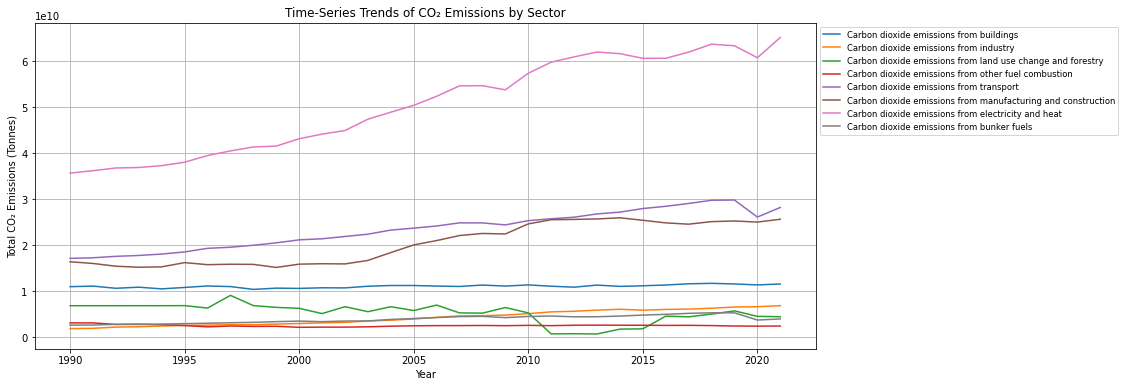

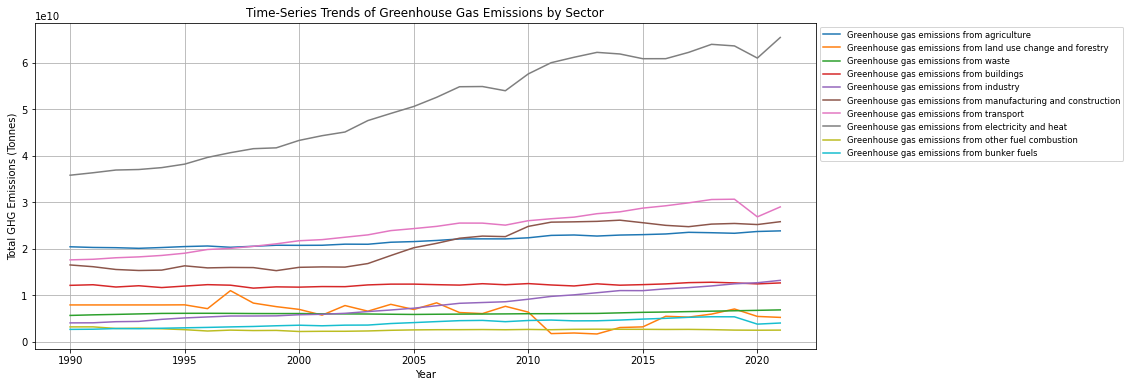

In [33]:
# Display all column names to confirm CO2 and GHG sector names
column_names = merged_sector_emissions.columns.tolist()

# Selection of columns based on actual names
co2_sectors = [col for col in column_names if "Carbon dioxide emissions" in col]
ghg_sectors = [col for col in column_names if "Greenhouse gas emissions" in col]

# Group by Year and sum emissions for CO₂ and GHG separately
co2_trends = merged_sector_emissions.groupby("Year")[co2_sectors].sum()
ghg_trends = merged_sector_emissions.groupby("Year")[ghg_sectors].sum()

# Plot CO₂ emissions trends
plt.figure(figsize=(14, 6))
for sector in co2_sectors:
    plt.plot(co2_trends.index, co2_trends[sector], label=sector)

plt.xlabel("Year")
plt.ylabel("Total CO₂ Emissions (Tonnes)")
plt.title("Time-Series Trends of CO₂ Emissions by Sector")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize="small")
plt.grid(True)
plt.show()

# Plot GHG emissions trends
plt.figure(figsize=(14, 6))
for sector in ghg_sectors:
    plt.plot(ghg_trends.index, ghg_trends[sector], label=sector)

plt.xlabel("Year")
plt.ylabel("Total GHG Emissions (Tonnes)")
plt.title("Time-Series Trends of Greenhouse Gas Emissions by Sector")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize="small")
plt.grid(True)
plt.show()


#### Regional CO2 and GHG emissions by sector

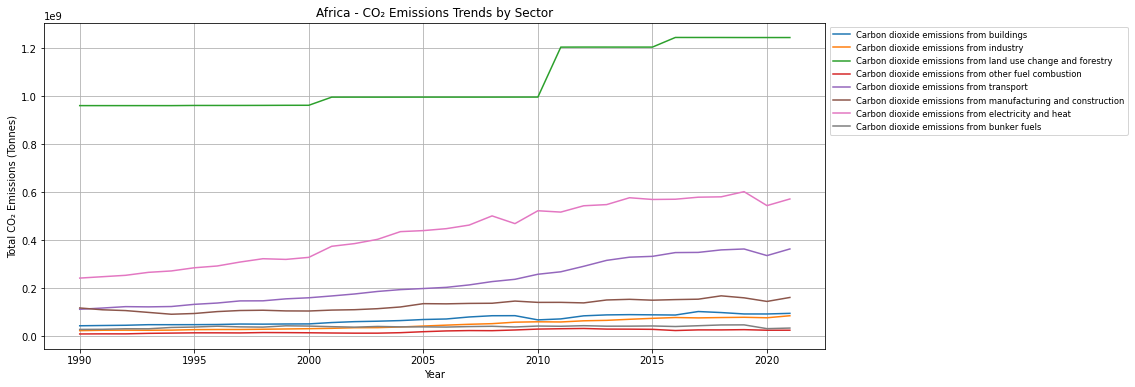

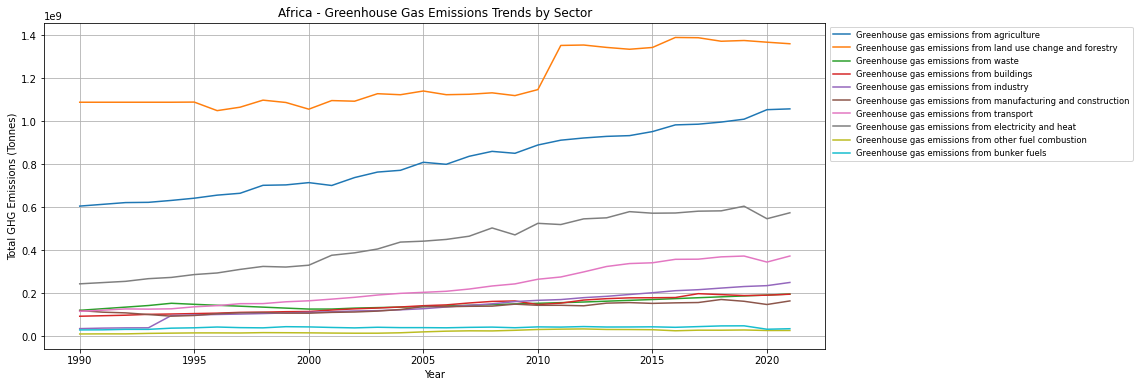

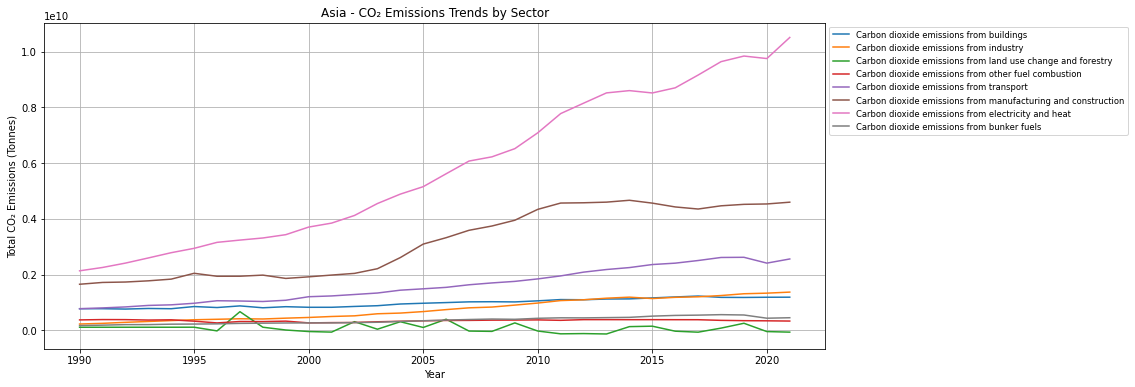

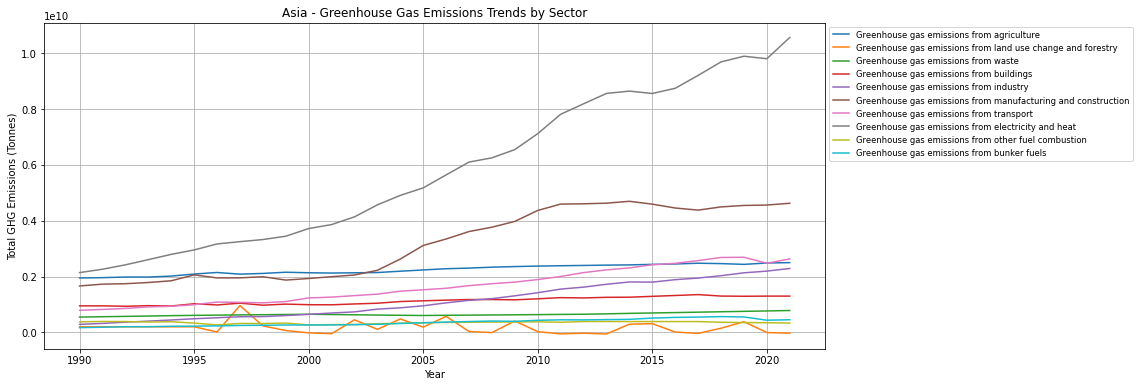

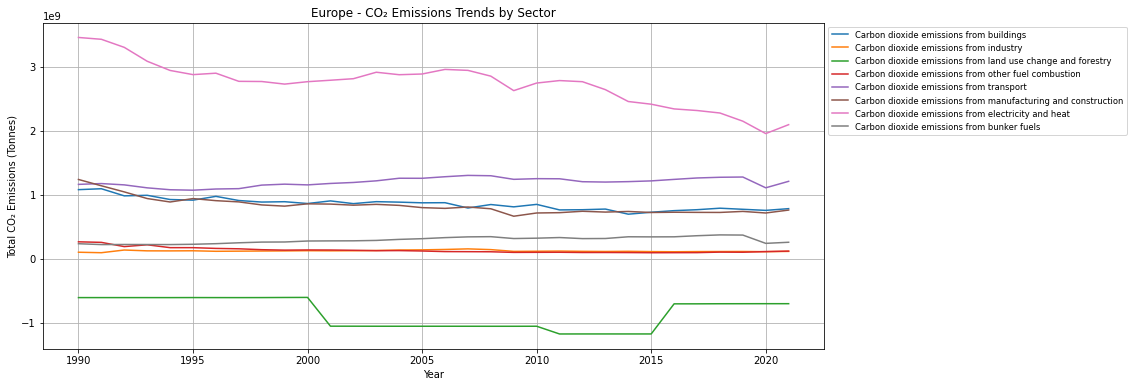

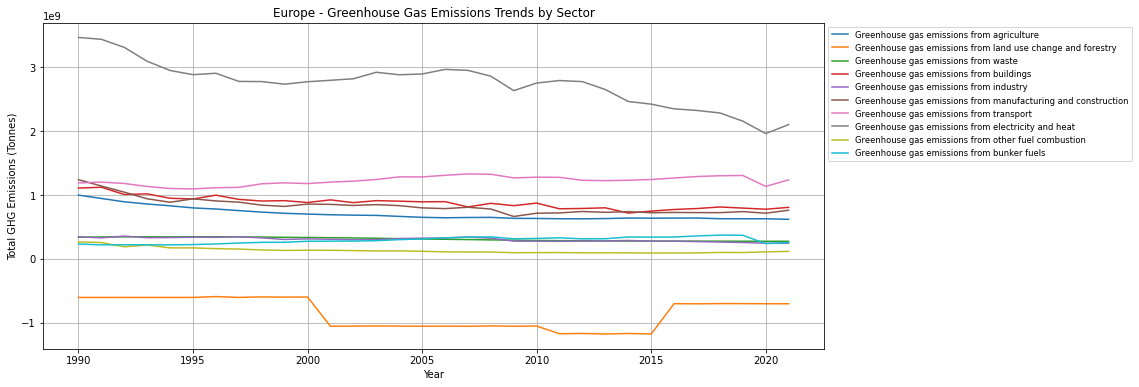

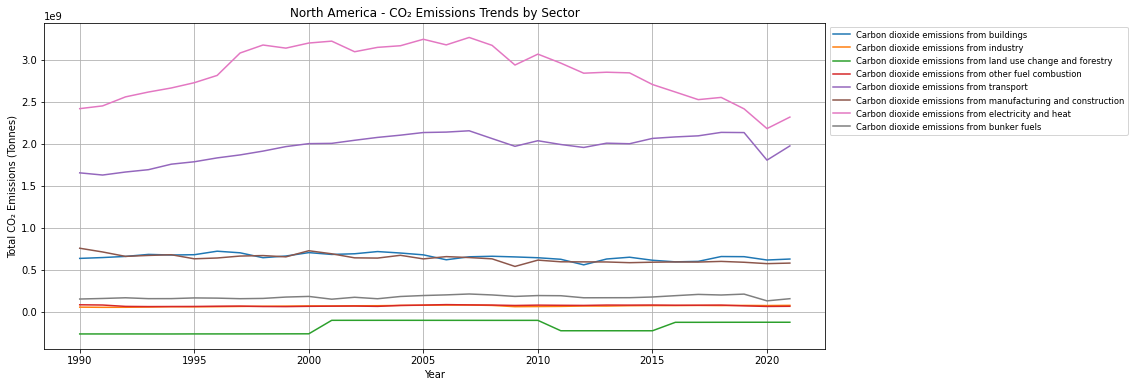

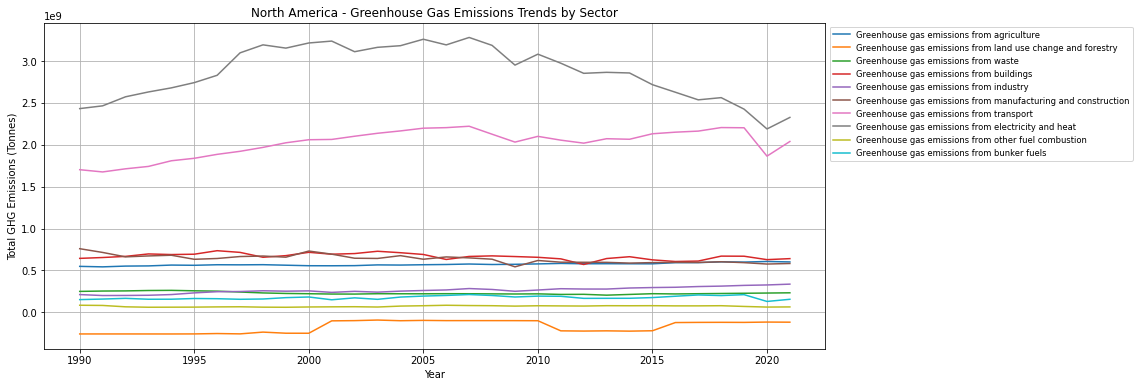

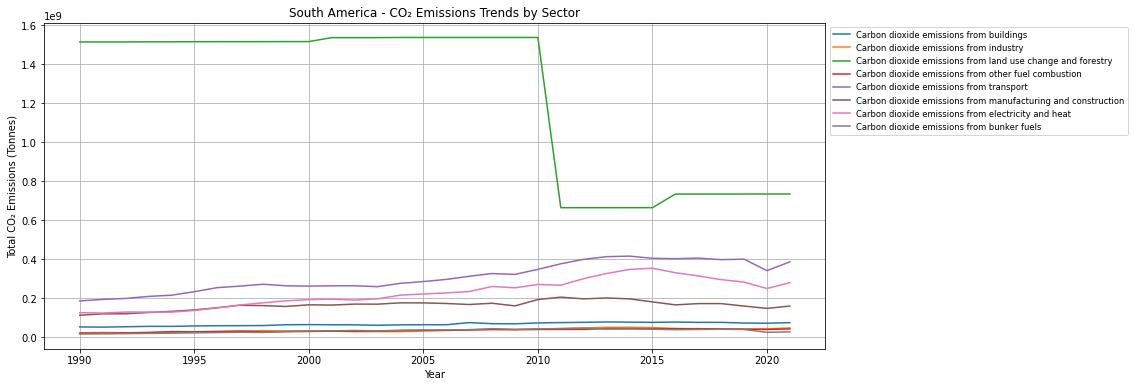

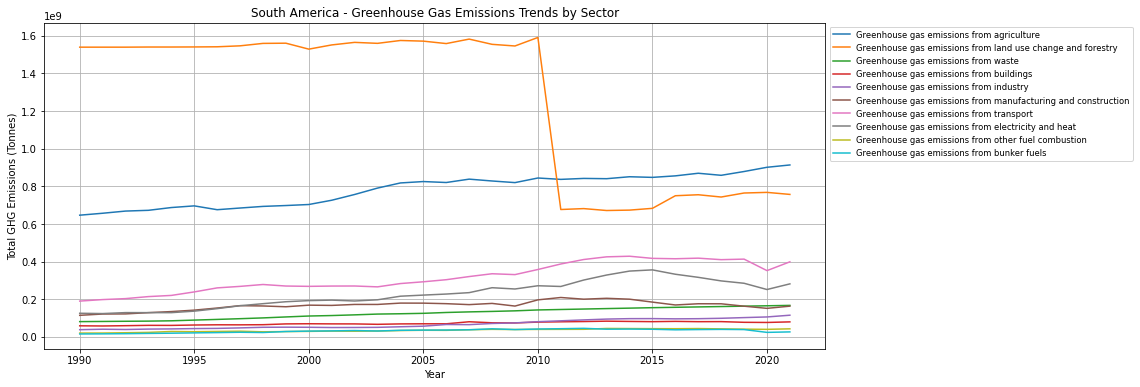

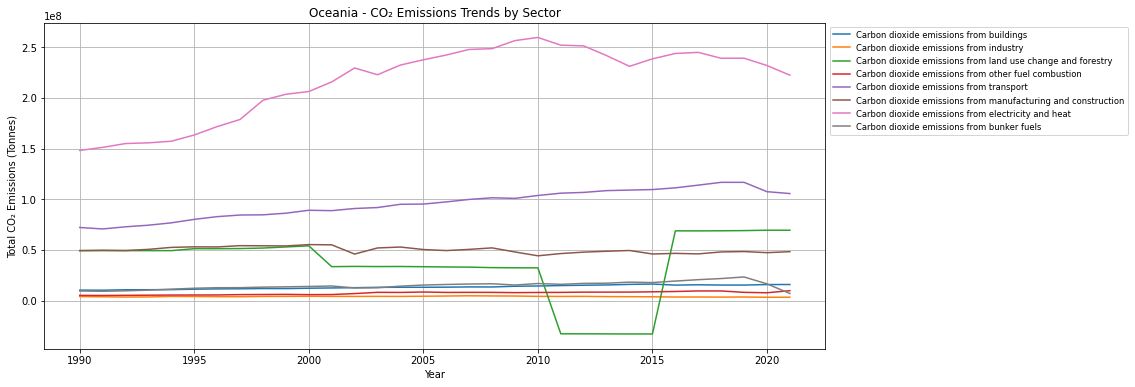

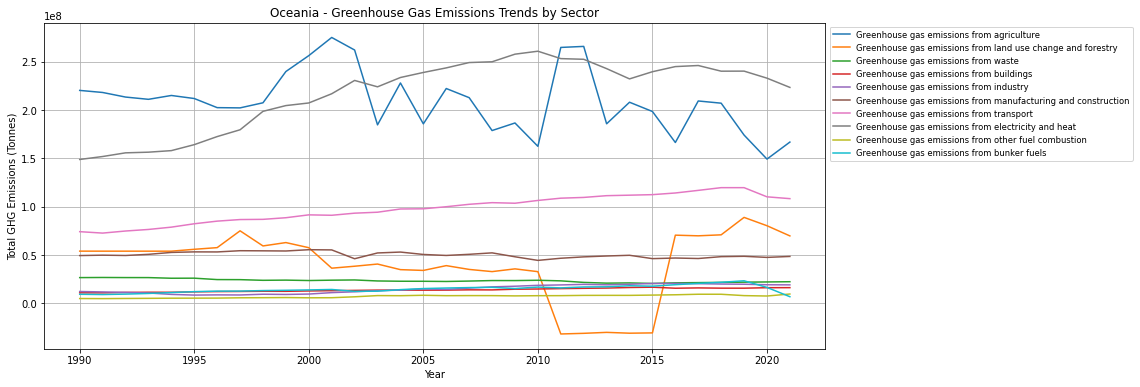

In [34]:
# Identify regions in the dataset (excluding individual countries)
regions = ["Africa", "Asia", "Europe", "North America", "South America", "Oceania"]

# Filter dataset for regional data only
regional_df = merged_sector_emissions[merged_sector_emissions["Entity"].isin(regions)]

# Group by Year and Region, summing emissions for all sectors
regional_co2_trends = regional_df.groupby(["Year", "Entity"])[co2_sectors].sum().reset_index()
regional_ghg_trends = regional_df.groupby(["Year", "Entity"])[ghg_sectors].sum().reset_index()

# Create separate plots for each region, displaying CO₂ and GHG trends
for region in regions:
    subset_co2 = regional_co2_trends[regional_co2_trends["Entity"] == region]
    subset_ghg = regional_ghg_trends[regional_ghg_trends["Entity"] == region]

    # Plot CO₂ emissions trends for the region
    plt.figure(figsize=(14, 6))
    for sector in co2_sectors:
        plt.plot(subset_co2["Year"], subset_co2[sector], label=sector)
    plt.xlabel("Year")
    plt.ylabel("Total CO₂ Emissions (Tonnes)")
    plt.title(f"{region} - CO₂ Emissions Trends by Sector")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize="small")
    plt.grid(True)
    plt.show()

    # Plot GHG emissions trends for the region
    plt.figure(figsize=(14, 6))
    for sector in ghg_sectors:
        plt.plot(subset_ghg["Year"], subset_ghg[sector], label=sector)
    plt.xlabel("Year")
    plt.ylabel("Total GHG Emissions (Tonnes)")
    plt.title(f"{region} - Greenhouse Gas Emissions Trends by Sector")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize="small")
    plt.grid(True)
    plt.show()


#### Regional Total CO2 and GHG Emissions

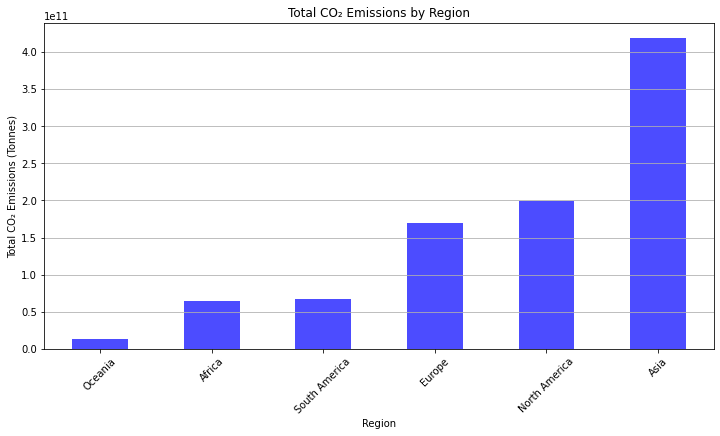

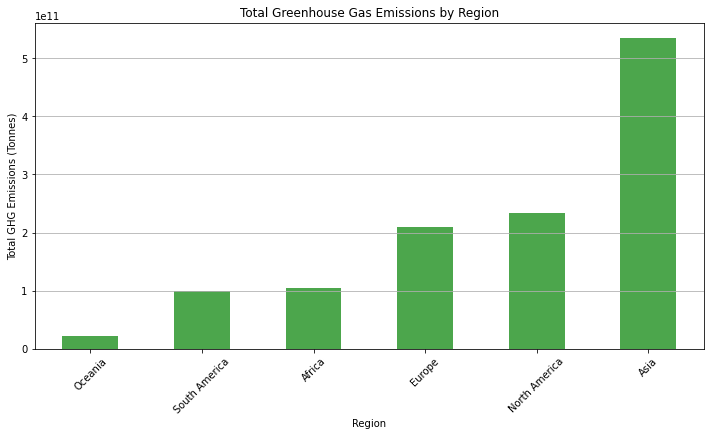

In [36]:
# Aggregate total emissions per region for CO₂ and GHG emissions
regional_totals_co2 = regional_co2_trends.groupby("Entity")[co2_sectors].sum()
regional_totals_ghg = regional_ghg_trends.groupby("Entity")[ghg_sectors].sum()

# Sort total emissions in ascending order for better visualization
sorted_co2_totals = regional_totals_co2.sum(axis=1).sort_values()
sorted_ghg_totals = regional_totals_ghg.sum(axis=1).sort_values()

# Plot sorted total CO₂ emissions per region
plt.figure(figsize=(12, 6))
sorted_co2_totals.plot(kind="bar", color="blue", alpha=0.7)
plt.xlabel("Region")
plt.ylabel("Total CO₂ Emissions (Tonnes)")
plt.title("Total CO₂ Emissions by Region")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Plot sorted total GHG emissions per region
plt.figure(figsize=(12, 6))
sorted_ghg_totals.plot(kind="bar", color="green", alpha=0.7)
plt.xlabel("Region")
plt.ylabel("Total GHG Emissions (Tonnes)")
plt.title("Total Greenhouse Gas Emissions by Region")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


#### Kenya CO2 and GHG Emission by Sector

In [ ]:
# Filter the dataset for Kenya
kenya_df = merged_sector_emissions[merged_sector_emissions["Entity"] == "Kenya"]

# Check available years and sectoral emissions for Kenya
kenya_df.describe()

,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels,...,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels
count,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,32.0,3.200000e+01,3.200000e+01,...,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,32.00000,32.000000,3.200000e+01
mean,2005.500000,1.242188e+06,1.652812e+06,3.146250e+06,234687.499375,4.692188e+06,2.170000e+06,0.0,1.420625e+06,1.794375e+06,...,3.169375e+06,9.703125e+05,3.808125e+06,2.373125e+06,2.193750e+06,4.811562e+06,1.428438e+06,4062.50000,235624.999375,1.810000e+06
std,9.380832,4.627459e+05,1.151947e+06,9.637832e+06,92770.420617,2.851676e+06,7.341662e+05,0.0,7.504233e+05,3.054023e+05,...,9.623204e+06,2.662098e+05,9.774636e+05,1.833992e+06,7.415709e+05,2.922975e+06,7.525660e+05,6148.36721,92664.414338,3.078018e+05
min,1990.000000,5.000000e+05,5.700000e+05,-7.570000e+06,110000.000000,2.320000e+06,1.280000e+06,0.0,4.100000e+05,1.200000e+06,...,-7.570000e+06,5.700000e+05,2.310000e+06,7.400000e+05,1.300000e+06,2.380000e+06,4.100000e+05,0.00000,110000.000000,1.210000e+06
25%,1997.750000,9.325000e+05,7.175000e+05,-4.300000e+06,150000.000000,2.690000e+06,1.547500e+06,0.0,6.850000e+05,1.547500e+06,...,-4.280000e+06,7.525000e+05,3.140000e+06,8.600000e+05,1.560000e+06,2.760000e+06,6.925000e+05,0.00000,150000.000000,1.557500e+06
50%,2005.500000,1.145000e+06,1.070000e+06,-4.300000e+06,220000.000000,3.065000e+06,1.995000e+06,0.0,1.335000e+06,1.770000e+06,...,-4.140000e+06,9.350000e+05,3.675000e+06,1.485000e+06,2.015000e+06,3.140000e+06,1.345000e+06,0.00000,220000.000000,1.790000e+06
75%,2013.250000,1.480000e+06,2.620000e+06,1.517000e+07,322500.000000,5.985000e+06,2.632500e+06,0.0,2.070000e+06,2.037500e+06,...,1.517000e+07,1.180000e+06,4.482500e+06,3.772500e+06,2.675000e+06,6.132500e+06,2.080000e+06,10000.00000,322500.000000,2.055000e+06
max,2021.000000,2.200000e+06,4.610000e+06,1.517000e+07,400000.000000,1.082000e+07,3.720000e+06,0.0,2.930000e+06,2.290000e+06,...,1.518000e+07,1.460000e+06,5.460000e+06,6.900000e+06,3.750000e+06,1.110000e+07,2.940000e+06,20000.00000,400000.000000,2.310000e+06


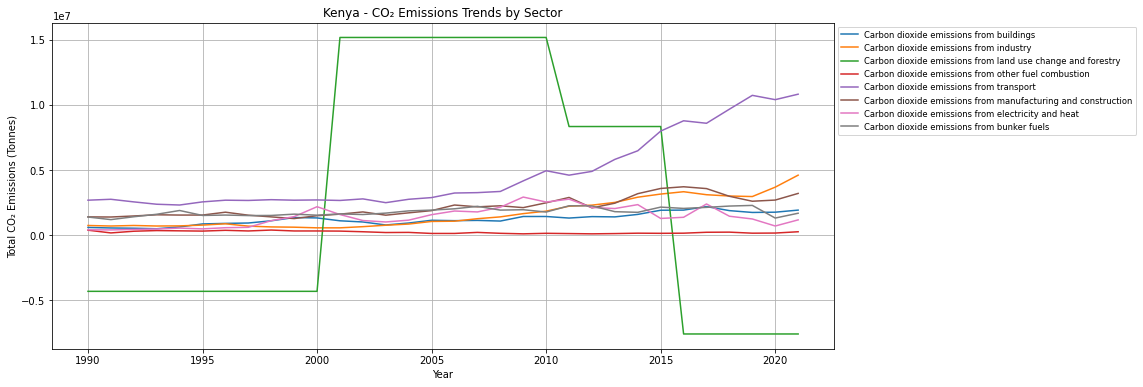

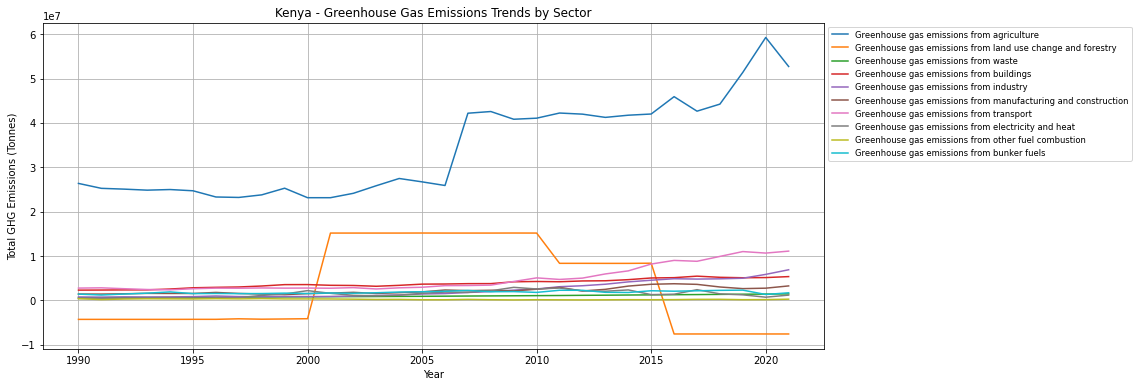

In [38]:
# Group Kenya's emissions by year for CO₂ and GHG separately
kenya_co2_trends = kenya_df.groupby("Year")[co2_sectors].sum()
kenya_ghg_trends = kenya_df.groupby("Year")[ghg_sectors].sum()

# Plot CO₂ emissions trends for Kenya
plt.figure(figsize=(14, 6))
for sector in co2_sectors:
    plt.plot(kenya_co2_trends.index, kenya_co2_trends[sector], label=sector)

plt.xlabel("Year")
plt.ylabel("Total CO₂ Emissions (Tonnes)")
plt.title("Kenya - CO₂ Emissions Trends by Sector")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize="small")
plt.grid(True)
plt.show()

# Plot GHG emissions trends for Kenya
plt.figure(figsize=(14, 6))
for sector in ghg_sectors:
    plt.plot(kenya_ghg_trends.index, kenya_ghg_trends[sector], label=sector)

plt.xlabel("Year")
plt.ylabel("Total GHG Emissions (Tonnes)")
plt.title("Kenya - Greenhouse Gas Emissions Trends by Sector")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize="small")
plt.grid(True)
plt.show()


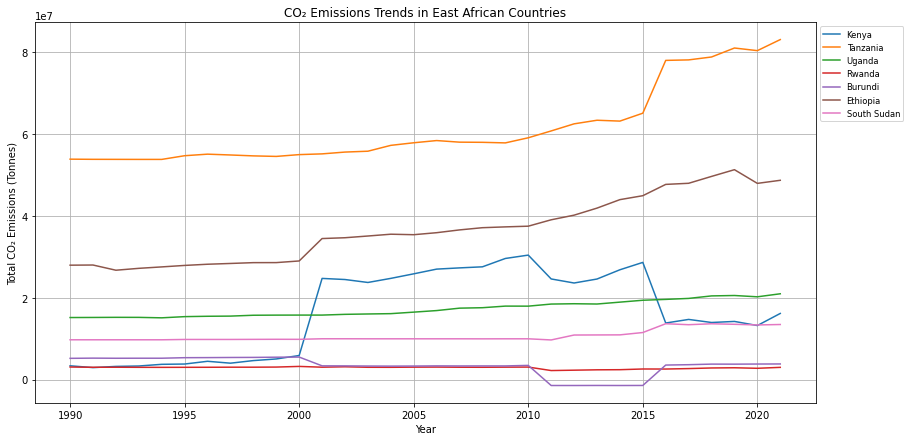

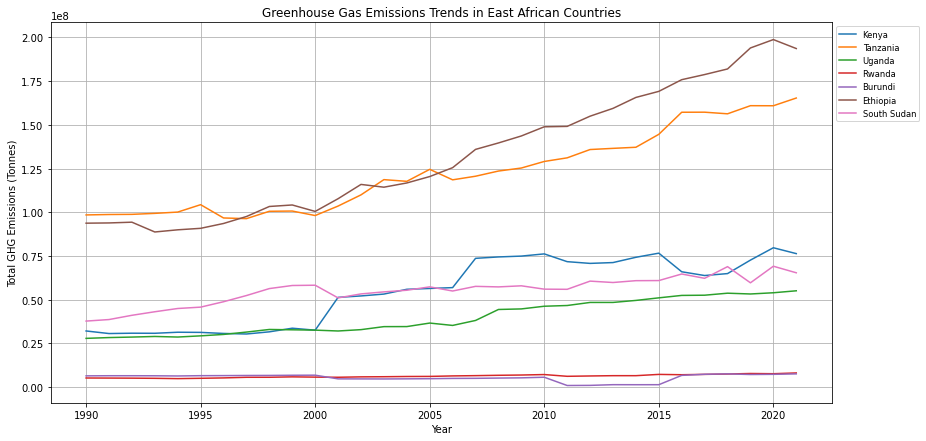

In [39]:
# Define East African countries for comparison
east_africa_countries = ["Kenya", "Tanzania", "Uganda", "Rwanda", "Burundi", "Ethiopia", "South Sudan"]

# Filter dataset for East African countries
east_africa_df = merged_sector_emissions[merged_sector_emissions["Entity"].isin(east_africa_countries)]

# Group by Year and Country, summing emissions
east_africa_co2_trends = east_africa_df.groupby(["Year", "Entity"])[co2_sectors].sum().reset_index()
east_africa_ghg_trends = east_africa_df.groupby(["Year", "Entity"])[ghg_sectors].sum().reset_index()

# Plot CO₂ emissions trends for East African countries
plt.figure(figsize=(14, 7))
for country in east_africa_countries:
    subset = east_africa_co2_trends[east_africa_co2_trends["Entity"] == country]
    plt.plot(subset["Year"], subset[co2_sectors].sum(axis=1), label=country)

plt.xlabel("Year")
plt.ylabel("Total CO₂ Emissions (Tonnes)")
plt.title("CO₂ Emissions Trends in East African Countries")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize="small")
plt.grid(True)
plt.show()

# Plot GHG emissions trends for East African countries
plt.figure(figsize=(14, 7))
for country in east_africa_countries:
    subset = east_africa_ghg_trends[east_africa_ghg_trends["Entity"] == country]
    plt.plot(subset["Year"], subset[ghg_sectors].sum(axis=1), label=country)

plt.xlabel("Year")
plt.ylabel("Total GHG Emissions (Tonnes)")
plt.title("Greenhouse Gas Emissions Trends in East African Countries")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize="small")
plt.grid(True)
plt.show()


In [43]:
# Prepare emissions data
africa_emissions = merged_sector_emissions.groupby("Entity")[co2_sectors].sum().sum(axis=1).reset_index()
africa_emissions.columns = ["Country", "Total_CO2_Emissions"]

# Create an enhanced interactive choropleth map
fig = px.choropleth(
    africa_emissions,
    locations="Country",
    locationmode="country names",
    color="Total_CO2_Emissions",
    title="Total CO₂ Emissions Across Africa",
    color_continuous_scale="Plasma",  # Try "Viridis", "Magma", or "Inferno" for better contrast
    projection="natural earth",
    hover_name="Country",
    hover_data={"Total_CO2_Emissions": ":,.0f"}  # Format numbers with commas
)

# Adjust layout for aesthetics
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="natural earth",
        center={"lat": 1.5, "lon": 17.5},  # Center Africa
    ),
    coloraxis_colorbar=dict(title="CO₂ Emissions (Tonnes)"),
)

# Show the interactive map
fig.show()


In [46]:
# Prepare emissions data
africa_ghg = merged_sector_emissions.groupby("Entity")[ghg_sectors].sum().sum(axis=1).reset_index()
africa_ghg.columns = ["Country", "Total_GHG_Emissions"]

# Create an enhanced interactive choropleth map
fig = px.choropleth(
    africa_ghg,
    locations="Country",
    locationmode="country names",
    color="Total_GHG_Emissions",
    title="Total Greenhouse Gas Emissions Across Africa",
    color_continuous_scale="Viridis",  # Try "Magma", "Cividis", or "Turbo" for contrast
    projection="natural earth",
    hover_name="Country",
    hover_data={"Total_GHG_Emissions": ":,.0f"}  # Format numbers with commas
)

# Adjust layout for aesthetics
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="natural earth",
        center={"lat": 1.5, "lon": 17.5},  # Center Africa
    ),
    coloraxis_colorbar=dict(title="GHG Emissions (Tonnes)"),
)

# Show the interactive map
fig.show()


#### Correlational Analysis of emissions between sectors

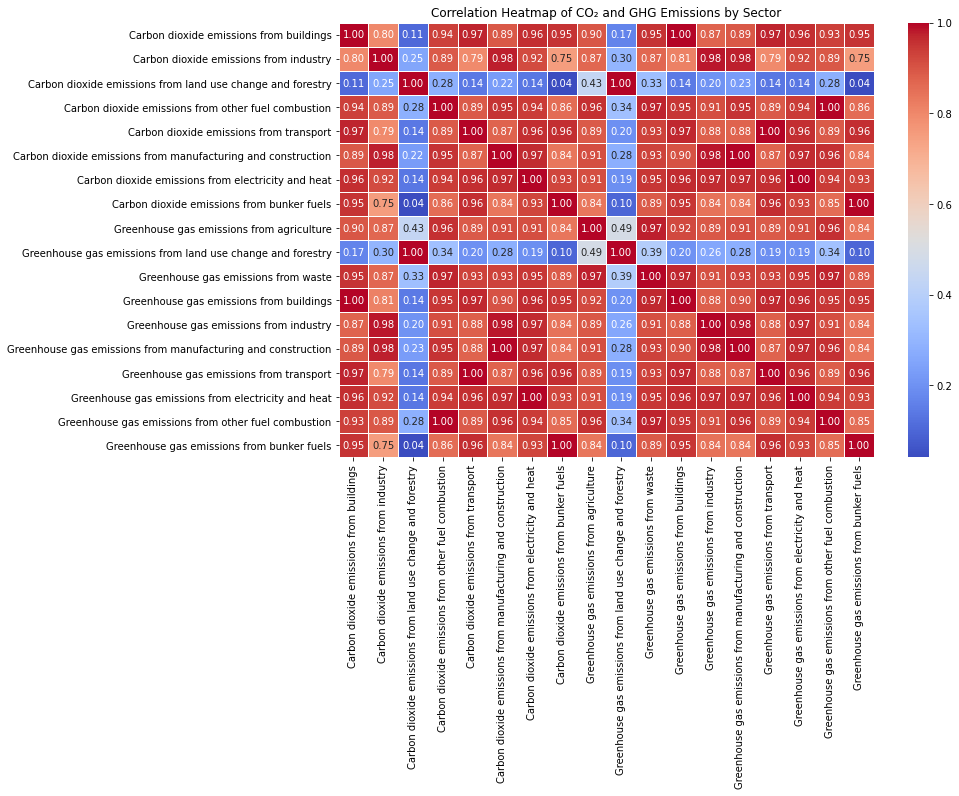

In [47]:
# Select only numerical emission columns for correlation analysis
sectoral_emissions_df = merged_sector_emissions[co2_sectors + ghg_sectors]

# Compute correlation matrix
correlation_matrix = sectoral_emissions_df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of CO₂ and GHG Emissions by Sector")
plt.show()


#### Feature Engineering - Emissions Intensity Score(EIS)

Emissions per Total Sector Output (If GDP Data is NOT Available):

EIS = Total Emissions from Sector / Total Emissions from All Sectors

- Measures how important a sector is to overall emissions.
- High EIS → Industry is a major emissions contributor.
- Low EIS → Industry plays a smaller role in emissions.
- Use Case: Identifying high-risk industries for climate policy interventions.

In [49]:
# Create a new DataFrame to store Emission Intensity Score (EIS)
eis_df = pd.DataFrame()

# Sum total emissions per sector across all years
sector_total_emissions = merged_sector_emissions[co2_sectors + ghg_sectors].sum()

# Compute total emissions across all sectors
total_emissions_all_sectors = sector_total_emissions.sum()

# Calculate Emission Intensity Score (EIS) for each sector
eis_df["Sector"] = sector_total_emissions.index
eis_df["Total Emissions"] = sector_total_emissions.values
eis_df["Emission Intensity Score"] = eis_df["Total Emissions"] / total_emissions_all_sectors

# Sort sectors by Emission Intensity Score (highest to lowest)
eis_df = eis_df.sort_values(by="Emission Intensity Score", ascending=False)
eis_df


,Sector,Total Emissions,Emission Intensity Score
15,Greenhouse gas emissions from electricity and ...,1.622547e+12,0.183011
6,Carbon dioxide emissions from electricity and ...,1.615533e+12,0.182220
14,Greenhouse gas emissions from transport,7.680660e+11,0.086632
4,Carbon dioxide emissions from transport,7.478380e+11,0.084350
8,Greenhouse gas emissions from agriculture,6.956075e+11,0.078459
13,Greenhouse gas emissions from manufacturing an...,6.555151e+11,0.073937
5,Carbon dioxide emissions from manufacturing an...,6.509750e+11,0.073425
11,Greenhouse gas emissions from buildings,3.895168e+11,0.043934
0,Carbon dioxide emissions from buildings,3.537775e+11,0.039903
12,Greenhouse gas emissions from industry,2.538597e+11,0.028633
